# Data Visualization on Earnings based on College Majors

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads = recent_grads.dropna()

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  172.000000   172.000000     172.000000     172.000000     172.000000   
mean    87.377907  3895.953488   39370.081395   16723.406977   22646.674419   
std     49.983181  1679.240095   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.750000  2403.750000    4549.750000    2177.500000    1778.250000   
50%     87.500000  3608.500000   15104.000000    5434.000000    8386.500000   
75%    130.250000  5503.250000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size      Employed      Full_time      Part_time  \
count  172.000000   172.000000     172.00000     172.000000     172.000000   
mean     0.522223   357.941860   31355.80814   26165.767442    8877.232558   
std      0.231205   619.680419   50777.42865   42957.1

# Looking into Column Relationships

### Using Scatterplot

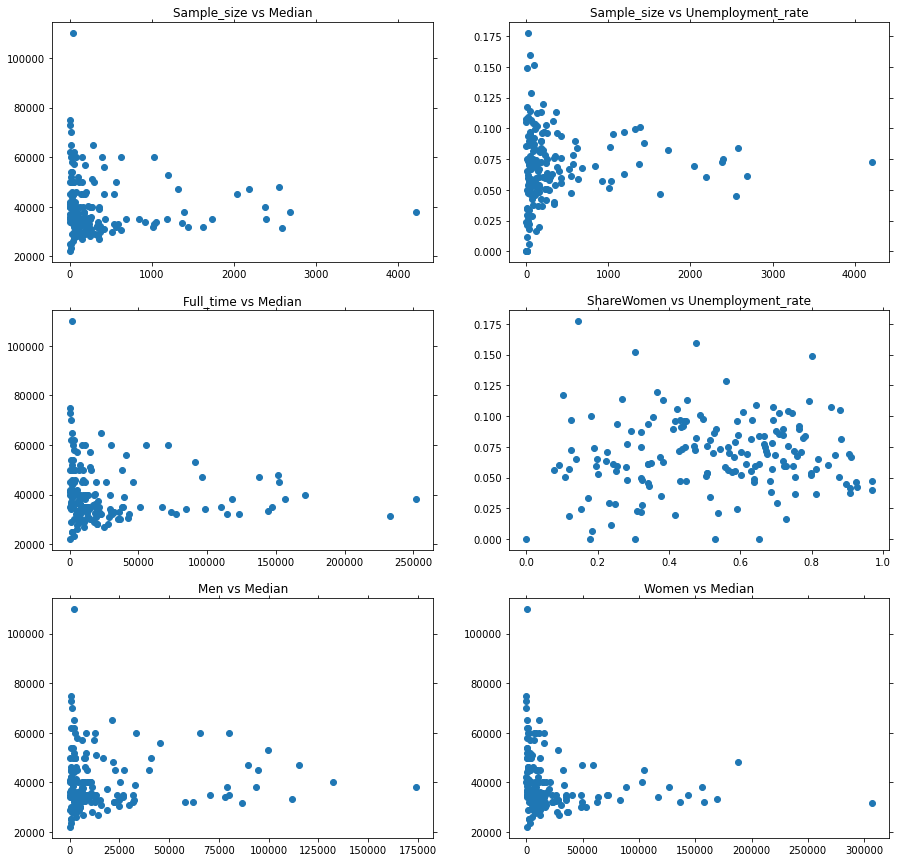

In [4]:
xcol = ['Sample_size', 'Sample_size', 'Full_time', 'ShareWomen', 'Men', 'Women']
ycol = ['Median', 'Unemployment_rate', 'Median', 'Unemployment_rate', 'Median', 'Median']

fig = plt.figure(figsize=(15,15))
for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.scatter(recent_grads[xcol[i]], recent_grads[ycol[i]])
    ax.tick_params(left="off", top="off", right="off", bottom="off")
    ax.set_title(xcol[i] + " vs " + ycol[i])
plt.show()

Exploring the following questions:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

### Using Histogram

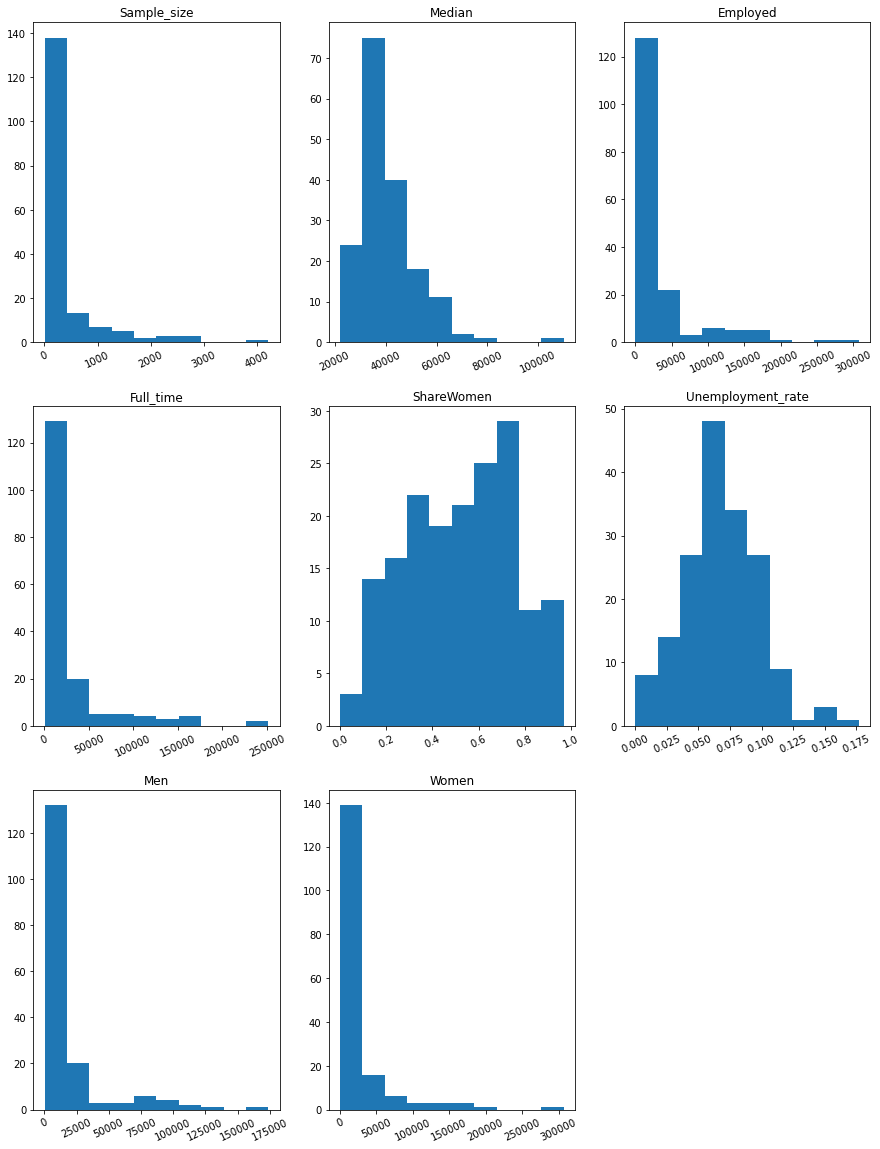

In [25]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(15,20))
for i in range(len(cols)):
    ax = fig.add_subplot(3,3,i+1)
    ax.hist(recent_grads[cols[i]], 10)
    plt.xticks(rotation=25)
    ax.set_title(cols[i])
plt.show()

### Using Scatter Matrix

In [26]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC19ADB2B0>,
      dtype=object)

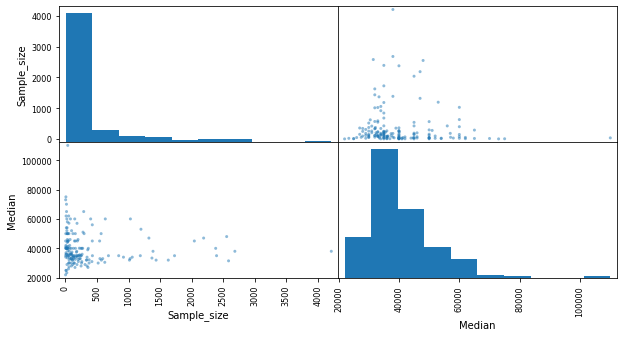

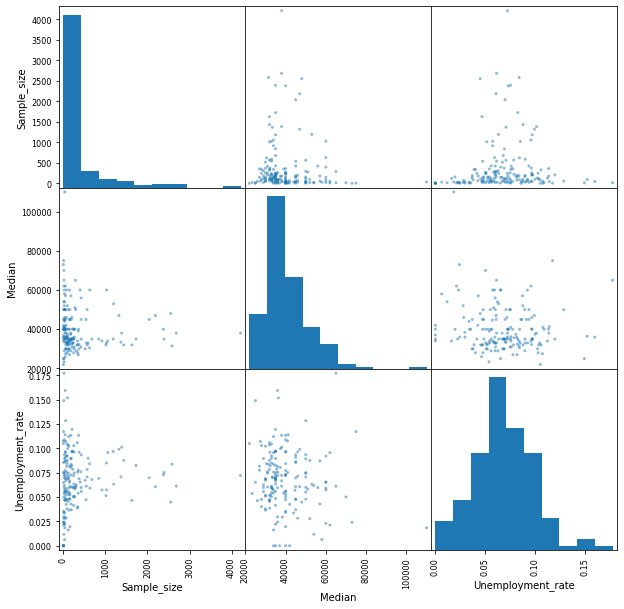

In [32]:
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,5))
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

### Using Barplot

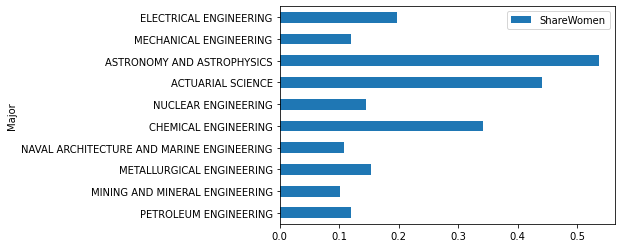

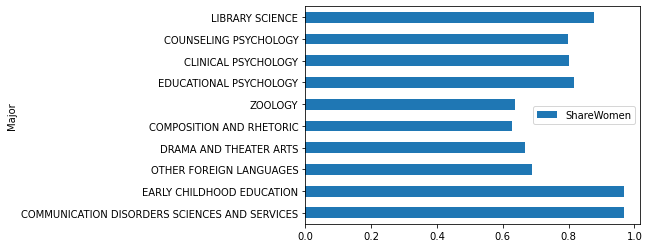

In [43]:
recent_grads[:10].plot.barh(x='Major', y='ShareWomen')
recent_grads.tail(10).plot.barh(x='Major', y='ShareWomen')

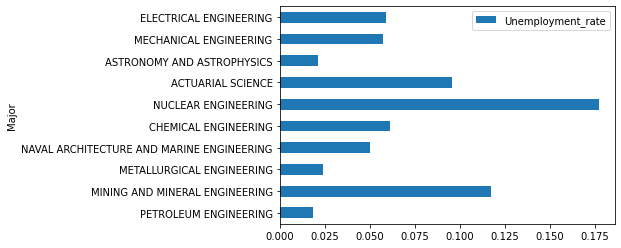

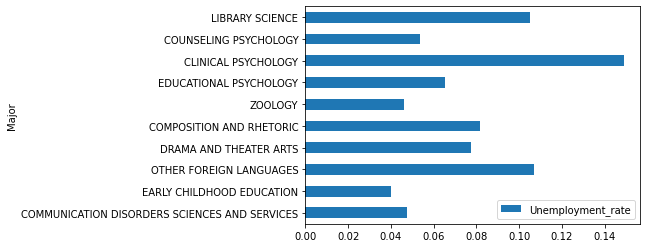

In [44]:
recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate')
recent_grads.tail(10).plot.barh(x='Major', y='Unemployment_rate')

Ideas:
- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.